# Assignment3
### Name: Shubham Chemate
### Roll Number: 31118

#### Q. Download the Abalone dataset. Data set has total 8 number of attributes. Sex, Length of shell , diameter, height, whole weight, shucked weight, viscera weight, shell weight and rings. 
#### Load the data from the data file and split it into training and test datasets. Summarize the properties in the training dataset. The number of rings is the value to predict: either as a continuous value or as a classification problem. Predict the age of the abalone from the physical measurements using linear regressing or predict ring class as classification problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
data = pd.read_csv('abalone_data', names = columns)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [6]:
data.shape

(4177, 9)

In [7]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [9]:
data.dtypes

Sex               category
Length             float64
Diameter           float64
Height             float64
Whole weight       float64
Shucked weight     float64
Viscera weight     float64
Shell weight       float64
Rings                int64
dtype: object

In [10]:
data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [11]:
replaceStruct = { "Sex": {"M": 0, "I": 1,"F":2 } }

In [12]:
data=data.replace(replaceStruct)

In [13]:
data.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [14]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.947091,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [16]:
data['Rings'].nunique()

28

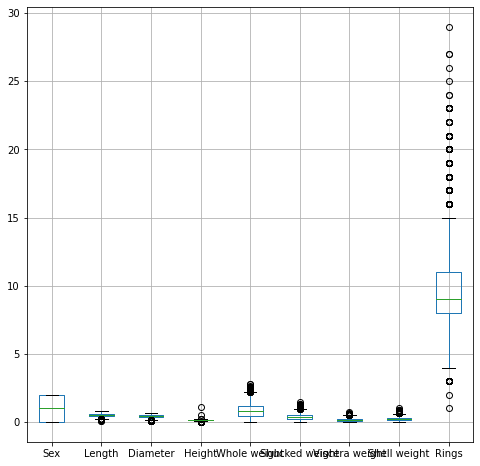

In [17]:
plt.figure(figsize=(8,8))
data.boxplot()
plt.show()

In [18]:
from scipy.stats import zscore

data_attr = data.loc[:, 'Sex':'Shell weight']
data_attr_z = data_attr.apply(zscore)
array = data_attr_z.values
X = array[:,0:8] # first 8 columns are features
y = data['Rings']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### 1. Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# fit the model
model.fit(X_train,y_train)

# make a probabilistic prediction
predicted_test_prob = model.predict(X_test)
predicted_train_prob = model.predict(X_train)

In [21]:
from sklearn.metrics import accuracy_score
# Accuray Score on train dataset
test_accuracy = model.score(X_test,y_test)
print('accuracy_score on train dataset : ', model.score(X_train,y_train))
print('accuracy_score on test dataset : ', test_accuracy)

accuracy_score on train dataset :  0.25179609989736573
accuracy_score on test dataset :  0.24162679425837322


### 2. Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [23]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.18660287081339713
